In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('data\\Bengali\\alphabet\\femaleCharacters.csv')
df2 = pd.read_csv('data\\Bengali\\alphabet\\malechar1.csv')
df3 = pd.read_csv('data\\Bengali\\alphabet\\malechar2.csv')

In [3]:
frames = [df1, df2, df3]

df = pd.concat(frames)

In [4]:
# Separating Data and Label
y = df["label"]
X = df.drop(labels = ["label"],axis = 1)

In [5]:
# Change label to alphabets
alphabets_mapper = {10: 'অ', 11: 'আ', 12:'ই', 13: 'ঈ', 14: 'উ', 15: 'ঊ', 16: 'ঋ', 17: 'এ', 18: 'ঐ', 19: 'ও', 20: 'ঔ',
                    21: 'ক', 22: 'খ', 23: 'গ', 24: 'ঘ', 25: 'ঙ', 26: 'চ', 27: 'ছ', 28: 'জ', 29: 'ঝ', 30: 'ঞ', 31: 'ট',
                    32: 'ঠ', 33: 'ড', 34: 'ঢ', 35: 'ণ', 36: 'ত', 37: 'থ', 38: 'দ', 39: 'ধ', 40: 'ন', 41: 'প', 42: 'ফ',
                    43: 'ব', 44: 'ভ', 45: 'ম', 46: 'য', 47: 'র', 48: 'ল', 49: 'শ', 50: 'ষ', 51: 'স', 52: 'হ', 53: 'ড়',
                    54: 'ঢ়', 55: 'য়', 56: 'ৎ', 57: 'ং', 58: 'ঃ', 59: ' ঁ'}
dataset = df.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fe = fm.FontEntry(
    fname='models\data\Bengali\font',
    name='kalpurush')

fm.fontManager.ttflist.insert(0, fe) # or append is fine
plt.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
plt.rcParams['ytick.labelsize'] = 15

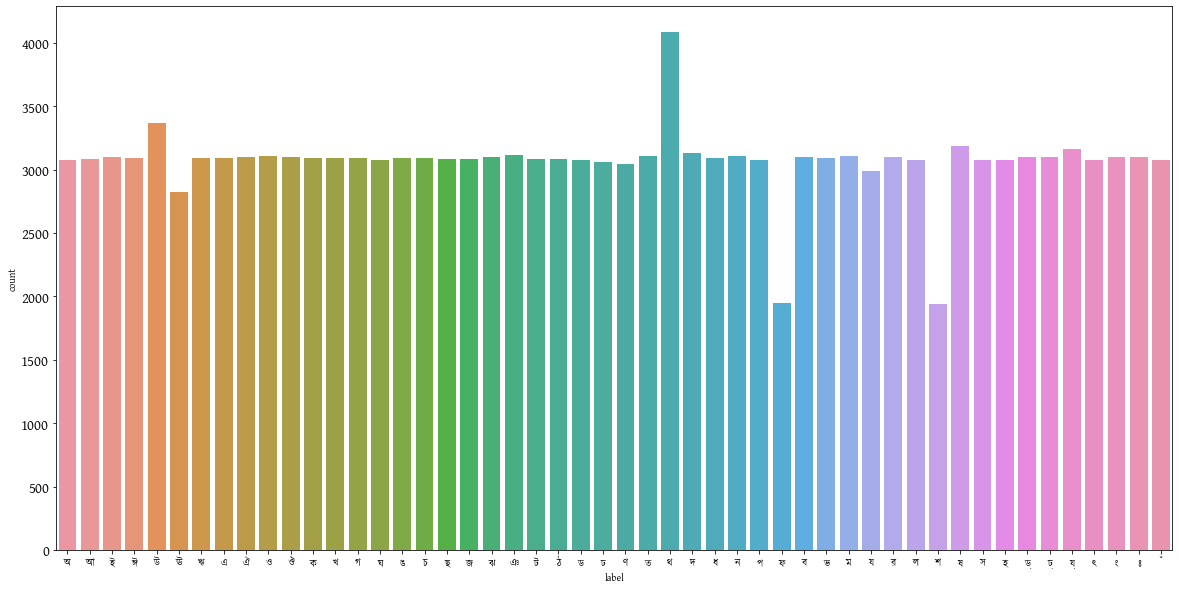

In [7]:
import seaborn as sns

plt.figure(figsize=(20,10))
graph = sns.countplot(x=dataset['label'])

plt.show()

In [8]:
# Normalize the data
X /=  255.0

# Reshape the array into 28 x 28 pixel
X = X.values.reshape(-1,28,28,1).astype('float32')

In [9]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


num_classes = y_test.shape[1] # 26


# my CNN architecture is In -> [[Conv2D->relu]*2 -> MaxPooling2D]*2 -> Dropout -> Flatten -> Dense -> Dense -> Out

model = Sequential()

model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=256, verbose=1)

Train on 130288 samples, validate on 22993 samples
Epoch 1/20
130288/130288 [==============================] - 419s 3ms/sample - loss: 0.7549 - acc: 0.7957 - val_loss: 0.3258 - val_acc: 0.9114
Epoch 2/20
130288/130288 [==============================] - 427s 3ms/sample - loss: 0.2495 - acc: 0.9311 - val_loss: 0.2263 - val_acc: 0.9400
Epoch 3/20
130288/130288 [==============================] - 429s 3ms/sample - loss: 0.1739 - acc: 0.9519 - val_loss: 0.1966 - val_acc: 0.9477
Epoch 4/20
130288/130288 [==============================] - 429s 3ms/sample - loss: 0.1323 - acc: 0.9625 - val_loss: 0.1930 - val_acc: 0.9512
Epoch 5/20
130288/130288 [==============================] - 427s 3ms/sample - loss: 0.1045 - acc: 0.9696 - val_loss: 0.1847 - val_acc: 0.9529
Epoch 6/20
130288/130288 [==============================] - 428s 3ms/sample - loss: 0.0861 - acc: 0.9739 - val_loss: 0.1926 - val_acc: 0.9524
Epoch 7/20
130288/130288 [==============================] - 429s 3ms/sample - loss: 0.0737 - acc:

In [14]:
scores = model.evaluate(X_test, y_test, verbose=0)                                                     

print('Test loss: %.2f%%' % scores[0])
print('Test accuracy: %.4f%%' % scores[1])
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Test loss: 0.28%
Test accuracy: 0.9567%
Large CNN Error: 4.33%


In [15]:
model.save('output/B_A.h5')